 Ce document est le TP n°1 du module IA de l'université de Toulouse.  Il reprend rapidement des éléments du cours et propose une mise en pratique interactive des notions de densité, de variance et de normalité.

Vous êtes un jeune entrepreneur désireux de faire fortune dans les jeux vidéo. Comme vous avez beaucoup d'imagination mais peu d'argent, vous souhaitez investir là où vous êtes sûr de faire du profit. Vous allez observer des données issues de ventes de jeux vidéo afin de faire votre propre étude de marché.

Cet ensemble de données contient une liste de jeux vidéo du genre "Action'. Il a été généré par le site de vgchartz.com.


Les champs incluent
*   name : Nom du jeu
*   console : Plate-forme de la version des jeux (c'est-à-dire PC, PS4, etc.)
*   genre : Genre du jeu
*   publisher : Éditeur du jeu
*   na_sales : Ventes en Amérique du Nord (en millions)
*   pal_sales : Ventes en dans les pays du réseau Pal (en millions)
*   jp_sales : Ventes au Japon (en millions)
*   other_sales : Ventes dans le reste du monde (en millions)
*   total_sales : Total des ventes mondiales.



Après avoir téléchargé le fichier vgchartz-2_1_2024.csv chargez-le dans le fichier jupyter

In [6]:
from google.colab import files
uploaded = files.upload()


ModuleNotFoundError: No module named 'google.colab'

La fonction read\_csv() de la librairie Pandas lit des données de type csv pour les stocker dans un dataframe.

À moins de vouloir faire frémir un statisticien, vous ne touchez pas aux données originales (car vous risquez de faire n'importe quoi au cours de ce T. P. sur ces pauvres données qui n'ont rien demandé).
Il faut donc copier les données dans un deuxième

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Data = pd.read_csv('vgchartz-2_1_2024.csv')


Stocker les données dans une variable df avec la fonction pd.read_csv() (elles sont présentent sous le nom vgchartz-2_1_2024.csv). On note cette variable df pour dataframe.


In [58]:
df = pd.read_csv("vgchartz-2_1_2024.csv")


Il est temps de distinguer une tendance sur les données! Pour cela, la fonction describe() vous donne des informations sur la répartition sur toute vos variables numériques.

Appliquer la fonction describe() à votre dataframe

In [59]:
df.describe()


,vg_score,critic_score,user_score,total_shipped,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,1043.000000,4334.000000,257.000000,4303.000000,11797.000000,9941.000000,4008.000000,9271.000000,10622.000000
mean,7.627709,7.387425,8.474708,5.028706,0.550432,0.333056,0.155322,0.205720,0.061593
std,1.338636,1.367820,1.237067,21.645171,0.982478,0.546074,0.201680,0.454762,0.149068
min,2.000000,1.500000,2.000000,0.070000,0.070000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,6.600000,8.000000,0.260000,0.130000,0.090000,0.040000,0.030000,0.010000
50%,8.000000,7.600000,8.800000,1.000000,0.260000,0.160000,0.090000,0.080000,0.020000
75%,8.600000,8.400000,9.300000,3.000000,0.560000,0.350000,0.190000,0.200000,0.050000
max,9.700000,10.000000,10.000000,520.000000,20.320000,9.760000,2.130000,9.850000,3.120000


Cherchez et citez à quoi correspond un objet de type dataframe sous Python.


Les Dataframes correspondent au format de données que l'on rencontre classiquement en économie, des tableaux à deux dimensions, avec des variables en colonnes et des observations en ligne.

Vérifiez la moyenne de la colonne jp_sales avec la fonction mean(). Comparez avec celle donnée par la fonction describe().



0.15532185628742515 c'est plus précis :)

In [60]:
df.jp_sales.mean()

np.float64(0.15532185628742515)

Quel a été le plus vendu?


In [61]:
max = df["total_sales"].idxmax()
df.iloc[max,1]

'Grand Theft Auto V'

Quel zone géographique a eu les meilleures ventes?


In [62]:
maxa= df["na_sales"].max()
maxj = df["jp_sales"].max()
maxp = df["pal_sales"].max()
maxo = df["other_sales"].max()
print(maxa,maxj,maxp,maxo)


9.76 2.13 9.85 3.12


## Notion de densité

Vous allez observer la densité de probabilité des données. En physique, la densité ou densité d'un corps est le rapport de sa masse volumique à la masse volumique d'un corps pris comme référence, c'est à dire que nous comparons le nombre d'une variable par rapport à un ensemble de variables observées. En théorie des probabilités ou en statistique, une densité de probabilité est une fonction qui permet de représenter une loi de probabilité sous forme d'intégrales.
 Dans un histogramme, la densité en un point $x$ est estimée par la proportion d'observations $x_1, x_2, ..., x_N$ qui se trouvent à proximité de $x$. Pour cela, nous traçons une boîte en $x$ et dont la largeur est définie par un paramètre de lissage $h$ (soit la largeur de la  boîte); nous comptons ensuite le nombre d'observations qui appartiennent à cette boîte.
Le problème avec les histogrammes, c'est que :
*  nous devons définir le paramètre $h$ (dans R il est calculé automatiquement)
*  les histogrammes produisent une estimation de la fréquence non continue.


La fonction plot(kind = 'density') fournit une estimation par noyau (ou encore méthode de Parzen-Rosenblatt, 1962). C'est une méthode non paramétrique d’estimation de la densité de probabilité d’une variable aléatoire. Elle se base sur un échantillon d’une population et permet d’estimer la densité de probabilité en tout point du support (intervalle min et max des valeurs observées).

Cette méthode du noyau consiste à retrouver la continuité : pour cela, nous remplaçons la boîte centrée en $x$ et de largeur $h$ par une loi gaussienne (définie par la suite) centrée en $x$. Plus une observation est proche du point de support $x$ plus la courbe en cloche lui donnera une valeur numérique importante. À l'inverse, les observations trop éloignées de $x$ se voient affecter d'une valeur numérique négligeable. Notez également que plus il y a d'observations dans le voisinage d'un point, plus sa densité est élevée. La méthode du noyau  est plus précise qu'un simple histogramme (fonction hist())

Affichons les total_sales à l'aide des fonctions hist() et plot()

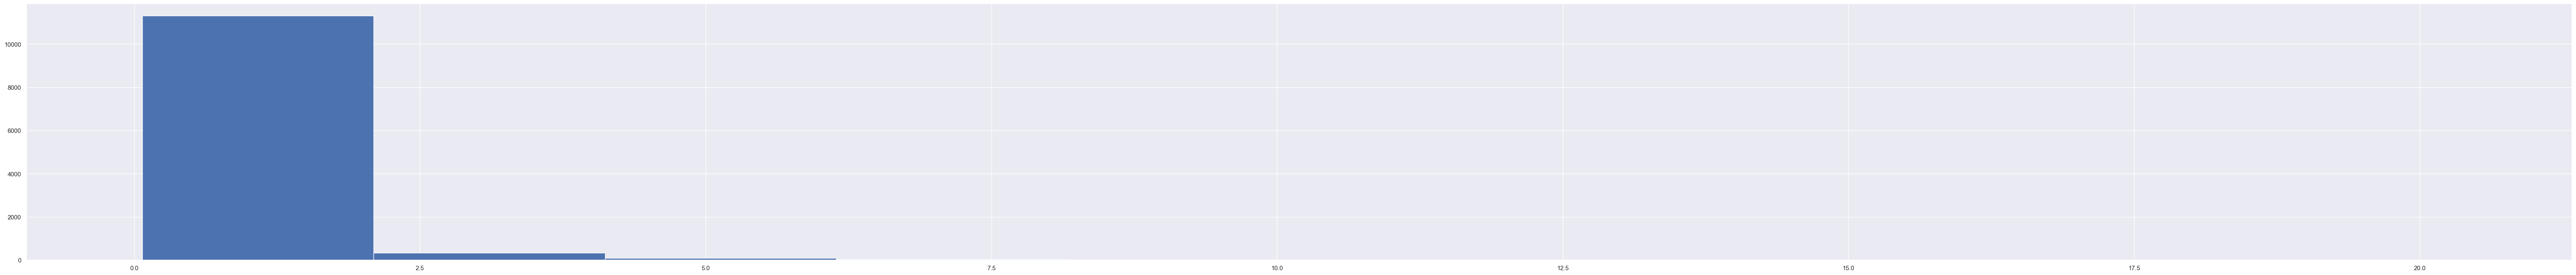

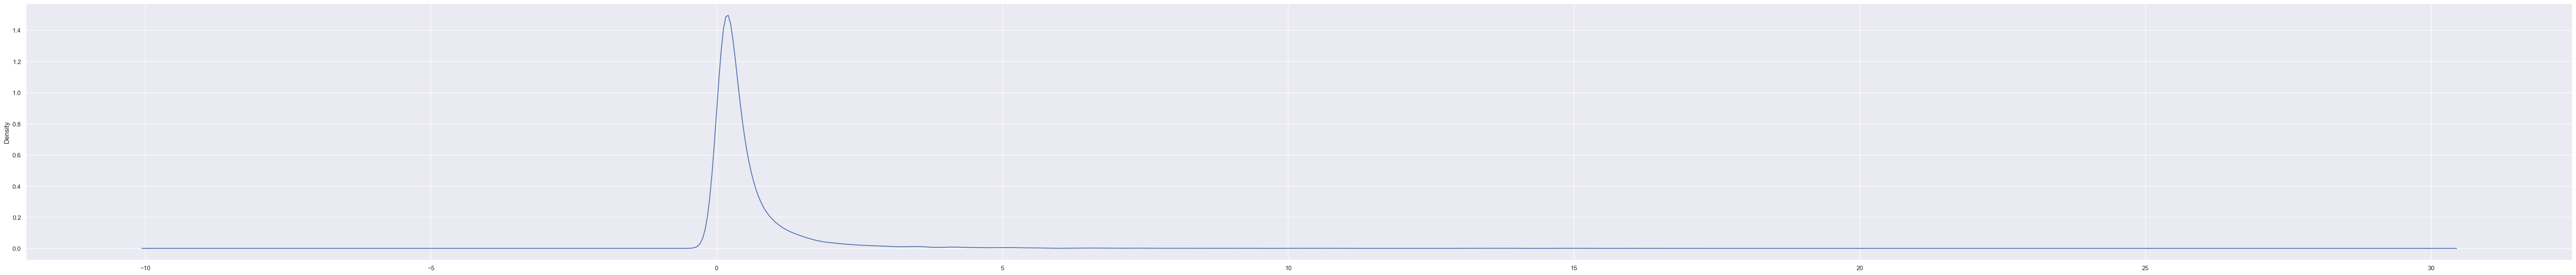

In [63]:
df["total_sales"].hist()
plt.show()


df["total_sales"].plot(kind = 'density')
plt.show()

Affichons l'histogramme par année

In [64]:
def extract_year(df, date_column):
    df['Year'] = pd.to_datetime(df[date_column]).dt.year
    return df

In [65]:
pd.to_datetime(df.iloc[[176]]['release_date']).dt.year

176    2013
Name: release_date, dtype: int32

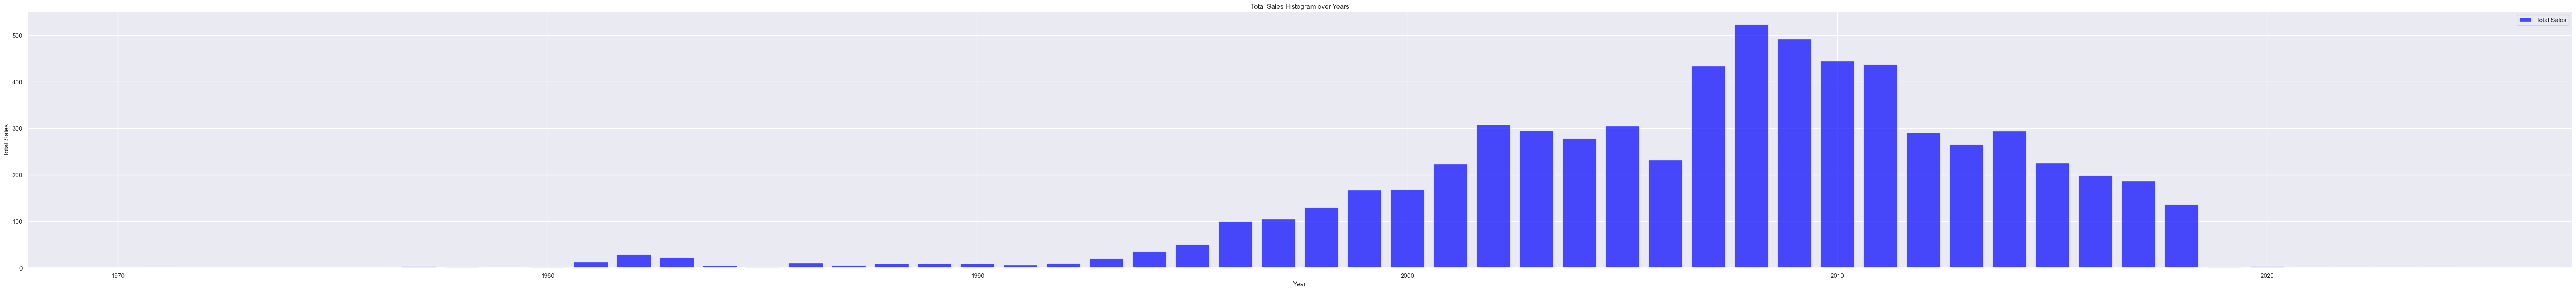

In [66]:
import matplotlib.pyplot as plt

df_temp =  extract_year(df, 'release_date')
# Groupage par année et somme  des ventes totales
sales_per_year = df.groupby(df_temp['Year'])['total_sales'].sum()

plt.bar(sales_per_year.index, sales_per_year.values, color='blue', alpha=0.7, label='Total Sales')


plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales Histogram over Years')
plt.legend()

 Y-a-il une année qui se démarque des autres? Laquelle?


oui, 2008

Pourquoi certaines valeurs extrêmes peuvent-elles fausser l'interprétation d'une variable ?

Elles peuvent avoir une forte influence sur la moyenne

Utilisez l'option kind='box' de la fonction plot sur votre dataframe df. À quoi ce graphique correspond-t-il ?

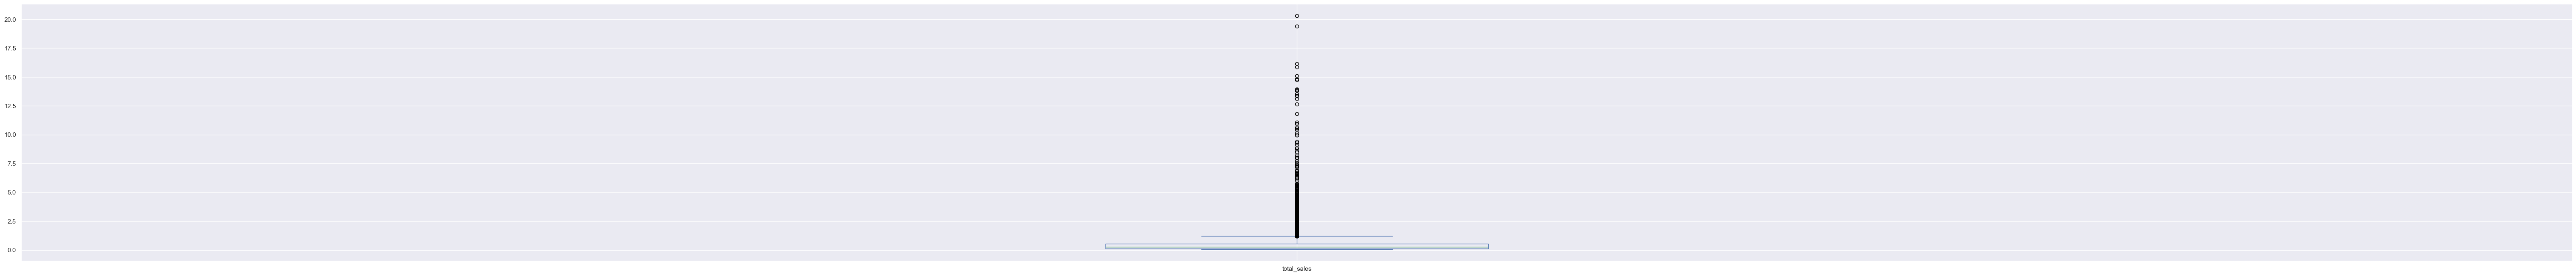

In [67]:

df["total_sales"].plot(kind='box' )
plt.show()

Notre dataset n'est supposé avoir que des jeux du genre 'Action'. Vérifions cela...

<Axes: xlabel='genre', ylabel='total_sales'>

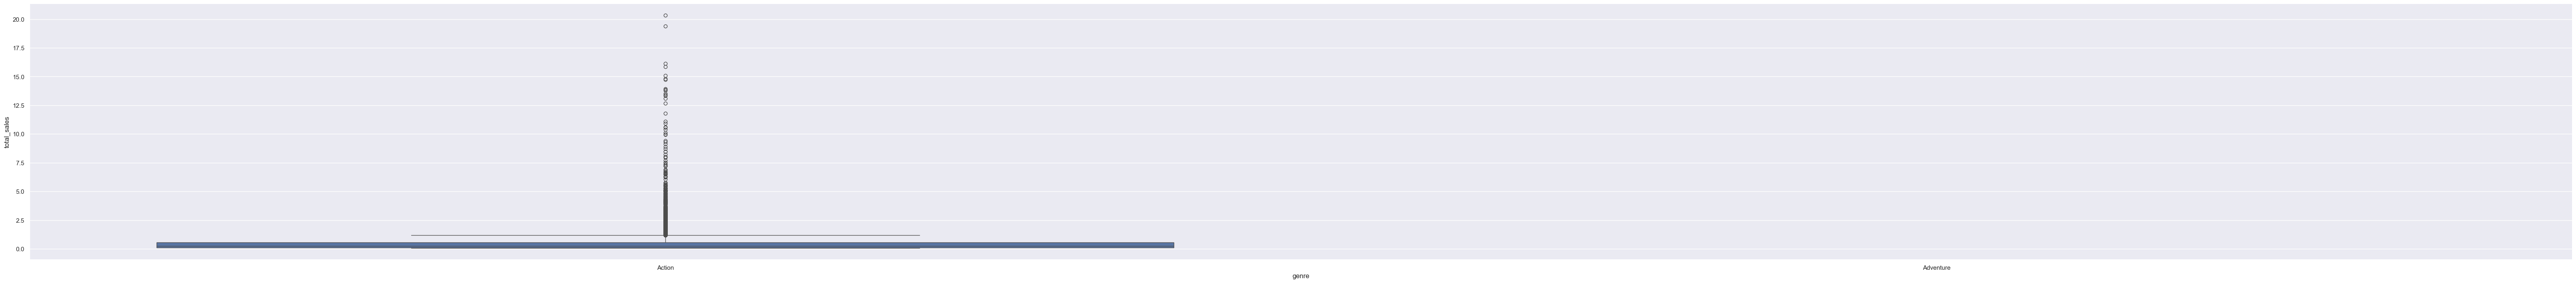

In [68]:
import seaborn as sns

#sns.set(rc={'figure.figsize':(11.7,8.27)})

#create boxplot by group
sns.boxplot(x='genre', y='total_sales', data=df)

Supprimez du dataset df les jeux d'un autre genre que celui d'action

<Axes: xlabel='genre', ylabel='total_sales'>

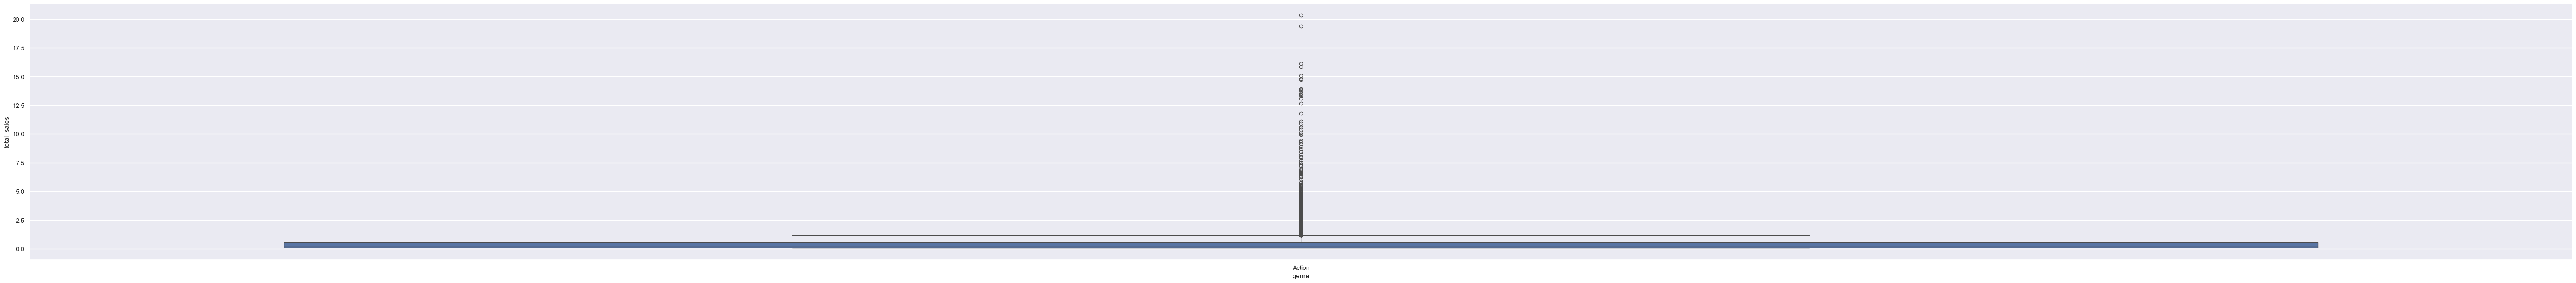

In [69]:
dfa = df[df["genre"]=="Action"]

import seaborn as sns

#sns.set(rc={'figure.figsize':(11.7,8.27)})

#create boxplot by group
sns.boxplot(x='genre', y='total_sales', data=dfa)

## La variance

Observons la variance pour l'une des plateformes

In [70]:
df_Ubisoft = df["pal_sales"][df["publisher"]== "Ubisoft"]


In [71]:
var = np.var(df_Ubisoft)

print(var)


0.2095141760426728


In [72]:
var = np.var(df_Ubisoft,ddof=1)

print(var)


0.209823650453371


Quel est la différence entre les deux fonctions ? Laquelle faut-il utilser ?

la diférence c'est que un prends un degré de liberté de 1 et l'autre 0, donc on divise pas n-1 avec ddof=1 et divise par n pour ddof=0. Il faut donc utiliser ddof=1 car on n'as q'un échantillon et pas une infinité de valeurs.

 La variance permet d'obtenir l'écart type, qui est la racine carrée de la variance. Pourquoi l'écart-type est souvent plus parlant que la variance pour appréhender la dispersion?


l'ecart-type est meilleur car il a la même unité que les données tandis que la variance est élevé au carré.

Donner la variance des pal_sales du publisher Nintendo.
Comparer avec celle d'Ubisoft

In [73]:
df_Nintendo = df["pal_sales"][df["publisher"]== "Nintendo"]
np.var(df_Nintendo,ddof=1)

np.float64(0.010814661269082574)

L'analyse de la variance permet d'étudier par exemple le comportement d'une variable qualitative à expliquer en fonction d'une ou de plusieurs variables nominales catégorielles.
Cependant, certain tests sont applicables uniquement si les données suivent une loi normal. Il existe des tests statistiques permettant de savoir si une distribution suit la loi normale.


## Un modèle dit "gaussien"

En théorie des probabilités et en statistique, la loi normale est l'une des lois de probabilités les plus adaptées pour modéliser des phénomènes naturels issus de plusieurs événements aléatoires. Elle est en lien avec de nombreux objets mathématiques dont le mouvement brownien, le bruit blanc gaussien pour ne citez qu'eux. Elle est également appelée loi gaussienne, loi de Gauss ou loi de Laplace-Gauss des noms de Laplace (1749-1827) et Gauss (1777-1855), deux mathématiciens, astronomes et physiciens qui l'ont étudiée.

Plus formellement, c'est une loi de probabilités absolument continue qui dépend de deux paramètres : son espérance, un nombre réel noté $\mu$, et son écart type, un nombre réel strictement positif noté $\sigma $. La densité de probabilité de la loi normale est donnée par :
$$
    f(x) = \frac{1}{\sigma \sqrt{2 \pi }} \exp{ \left( -  \frac{1}{2}  (\frac{x - \mu }{\sigma })^2 \right)}.
$$



La courbe de cette densité est appelée courbe de Gauss ou \textbf{courbe en cloche}, entre autres. C'est la représentation la plus connue de cette loi. La loi normale d'espérance nulle et d'écart type unitaire est appelée loi normale centrée réduite ou loi normale standard.

Lorsqu'une variable aléatoire X suit la loi normale, elle est dite gaussienne ou normale et il est habituel d'utiliser la notation avec la variance $\sigma^2$.
Vous comprenez peut-être maintenant pourquoi nous vous avons obligé à connaître la fonction exponentielle. C'est grâce à cette fonction qu'on modélise cette forme de cloche représentative de la gaussienne.
Nous allons essayer de comprendre le pic important suite à notre fonction density().

En statistique, le test de Shapiro–Wilk teste l'hypothèse nulle (aussi appelé hypothèse $H_o$) selon laquelle un échantillon analysé est issu d'une population normalement distribuée. Nous allons regarder si les ventes  sont normalement distribuée pour différents genre

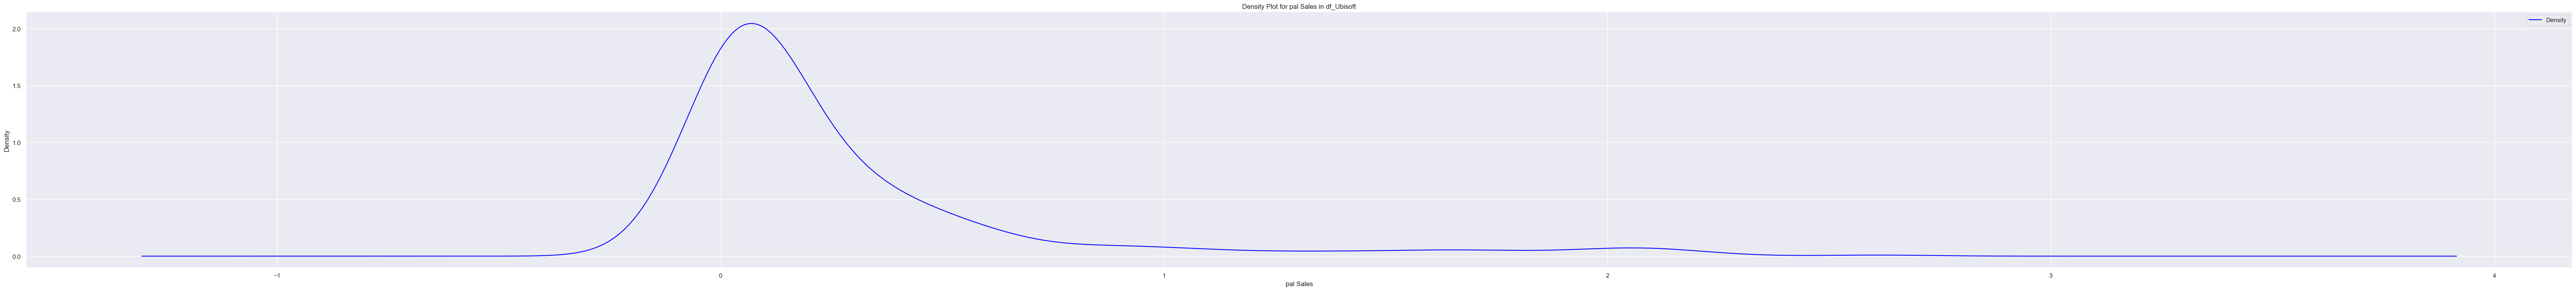

In [74]:
df_Ubisoft.plot(kind='kde', color='blue', label='Density')

plt.xlabel('pal Sales')
plt.ylabel('Density')
plt.title('Density Plot for pal Sales in df_Ubisoft')

plt.legend()
plt.show()

ShapiroResult(statistic=np.float64(0.6107986022225191), pvalue=np.float64(2.066784908051668e-36))
ShapiroResult(statistic=np.float64(0.8372183003829067), pvalue=np.float64(8.233105543193702e-14))


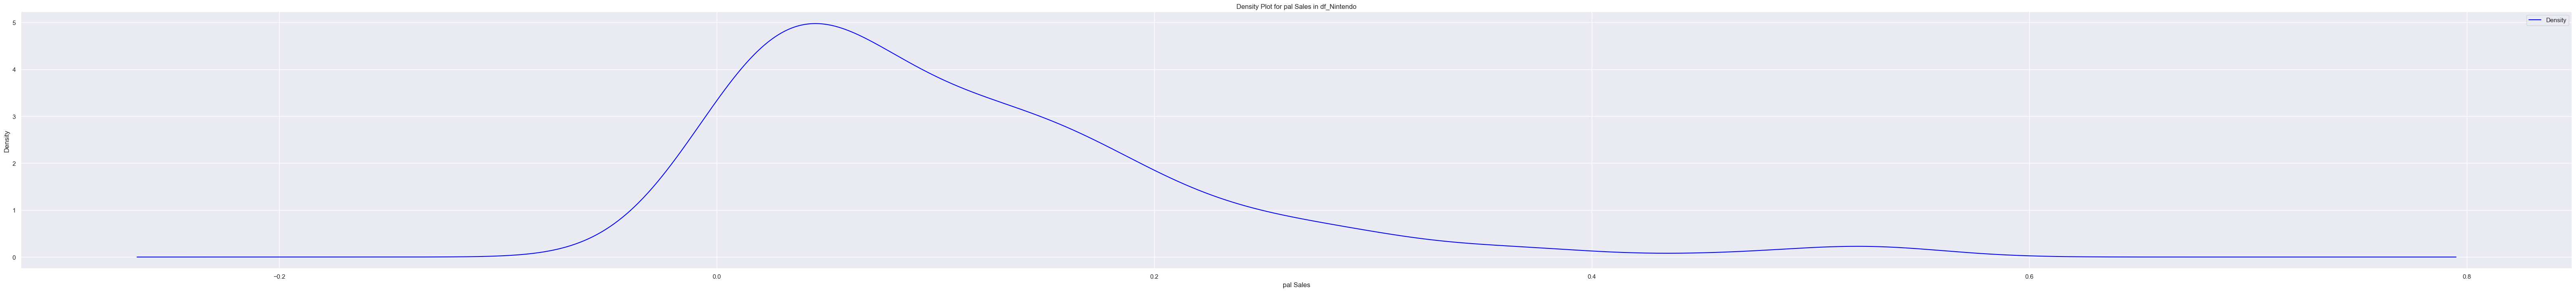

In [75]:
dfUna = df_Ubisoft.dropna()
shapiro_test = stats.shapiro(dfUna)
print(shapiro_test)
dfNna = df_Nintendo.dropna()
shapiro_test = stats.shapiro(dfNna)
print(shapiro_test)
dfNna.plot(kind='kde', color='blue', label='Density')

plt.xlabel('pal Sales')
plt.ylabel('Density')
plt.title('Density Plot for pal Sales in df_Nintendo')

plt.legend()
plt.show()

Conclure sur les résultats du test

La valeur est très proche de zero ce qui represente un distribution normale

Effectuer le même test pour la plateforme Nintendo. Comparez les deux résultats

Affichez la courbe de densité des palsales pour le publisher Nintendo

Tester la normalité de la distribution total_sales pour toutes les consoles.

C:\Users\osear\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11797.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.4347516948568141), pvalue=np.float64(4.566455509316795e-105))


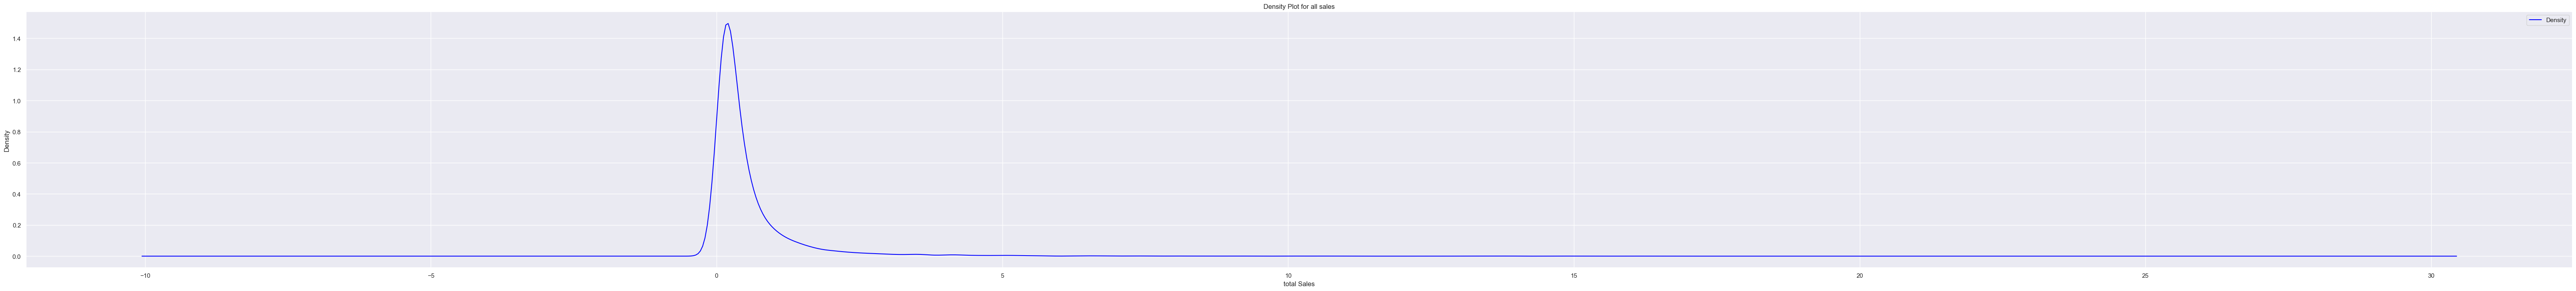

In [76]:

dftot= df["total_sales"]
dftotna = dftot.dropna()
shapiro_test = stats.shapiro(dftotna)
print(shapiro_test)
dftotna.plot(kind='kde', color='blue', label='Density')

plt.xlabel('total Sales')
plt.ylabel('Density')
plt.title('Density Plot for all sales')

plt.legend()
plt.show()

Lorsqu'on effectue un test de shapiro sur un grand nombre d'observation, le test de shapiro peut-être biaisé.
Expliquez ce que fait le code suivant et conclure sur le résultat du test.

In [77]:
dfna = df["total_sales"].dropna()
mean= dfna.mean()

sd = dfna.std()

x1 = np.random.normal(loc=mean,scale=sd,size= len(df))
ks_test = stats.kstest(dfna,x1)
print(ks_test)


KstestResult(statistic=np.float64(0.3113664596273292), pvalue=np.float64(0.0), statistic_location=np.float64(0.0696489916635673), statistic_sign=np.int8(-1))


## Time to decide
La fonction pointplot() vous permet d'avoir la moyenne et l'intervalle de confiance.
L'intervalle de confiance permet d'évaluer la précision de l'estimation d'un paramètre statistique sur un échantillon.

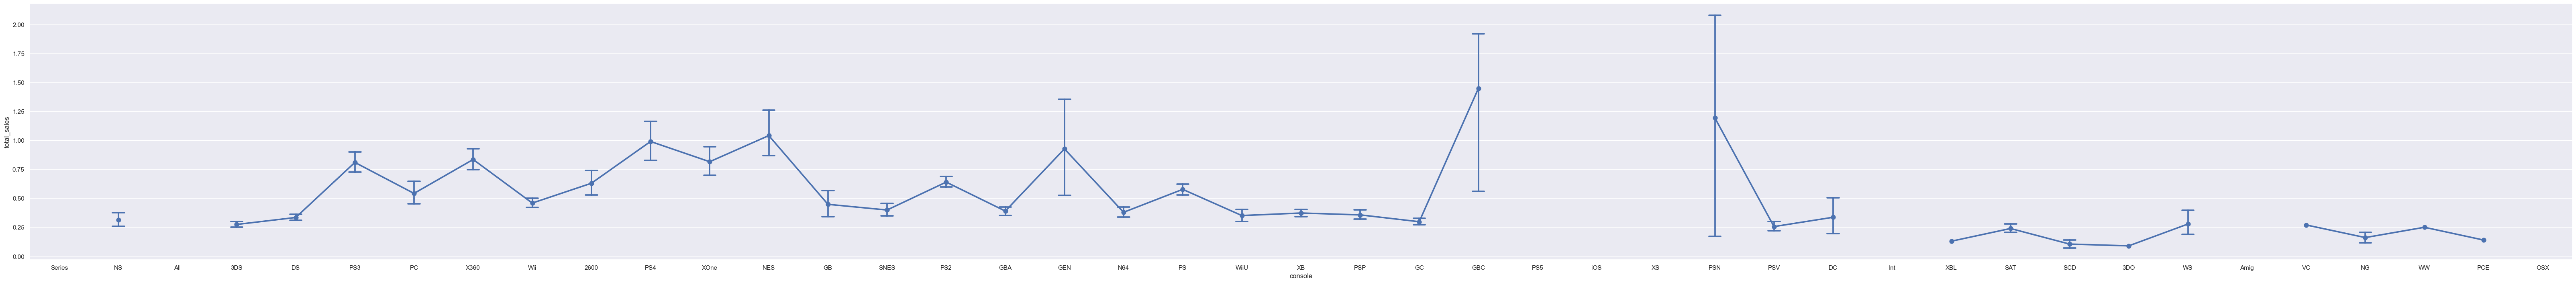

<Figure size 8170x827 with 0 Axes>

In [78]:
sns.set(rc={'figure.figsize':(81.7,8.27)})
ax = sns.pointplot(x=df["console"] ,  y=df["total_sales"], data=df, estimator=np.mean,capsize=.2)
plt.figure()
plt.show()

Expliquez le principe de l'option boxplot.

Un box-plot est un graphique simple composé d'un rectangle duquel deux droites sortent afin de représenter certains éléments des données. La valeur centrale du graphique est la médiane (il existe autant de valeur supérieures qu'inférieures à cette valeur dans l'échantillon).

In [79]:
liste_publishers = df['publisher'].unique()

# Affichez la liste des publishers
print(liste_publishers)

['Ubisoft' 'Nintendo' 'Microsoft' 'Namco' '505 Games' 'Kunos Simulazioni'
 'Capcom' 'Studio Wildcard' 'Koei Tecmo' 'Microsoft Studios'
 'GT Interactive' 'Bohemia Interactive' 'Fox Interactive'
 'Bandai Namco Entertainment' 'Electronic Arts' 'Atari' 'Meridian4'
 'Microsoft Game Studios' 'LucasArts' 'Bethesda Softworks'
 'Rockstar Games' 'Blizzard Entertainment'
 'Warner Bros. Interactive Entertainment' 'Parker Brothers'
 'Telltale Games' 'PopCap Games' 'Sony Interactive Entertainment'
 'Activision' 'KOEI' 'Re-Logic' 'Sega' '2K Games' 'Valve'
 'PUBG Corporation' 'Square Enix' 'EA Sports' 'Mojang' 'THQ' 'Techland'
 'Parker Bros.' 'Astragon' 'CD Projekt Red Studio' 'Curve Digital'
 'Konami' 'Namco Bandai Games' 'PF.Magic' 'Square' 'Melbourne House'
 'Bandai' 'Psygnosis' 'Maxis' 'Agetec' 'Rebellion Developments'
 'Chucklefish' 'ConcernedApe' 'Atlus' 'Sony Computer Entertainment'
 'Hasbro Interactive' 'Eidos Interactive' 'Deep Silver'
 'Bandai Namco Games' 'VU Games' 'Humongous Entertainment

À partir de la liste des publisher ci-dessous, creer un dataset avec uniquement des publisher de cette listes

In [88]:
liste_publishers = ['Ubisoft', 'Nintendo' ,'Microsoft','Epic Games'  ,  'Blizzard Entertainment',  'GT Interactive' , 'Electronic Arts' 'Atari' , 'Microsoft Game Studios' , 'LucasArts' , 'Rockstar Games']

subset_df = df[df['publisher'].isin(liste_publishers)]


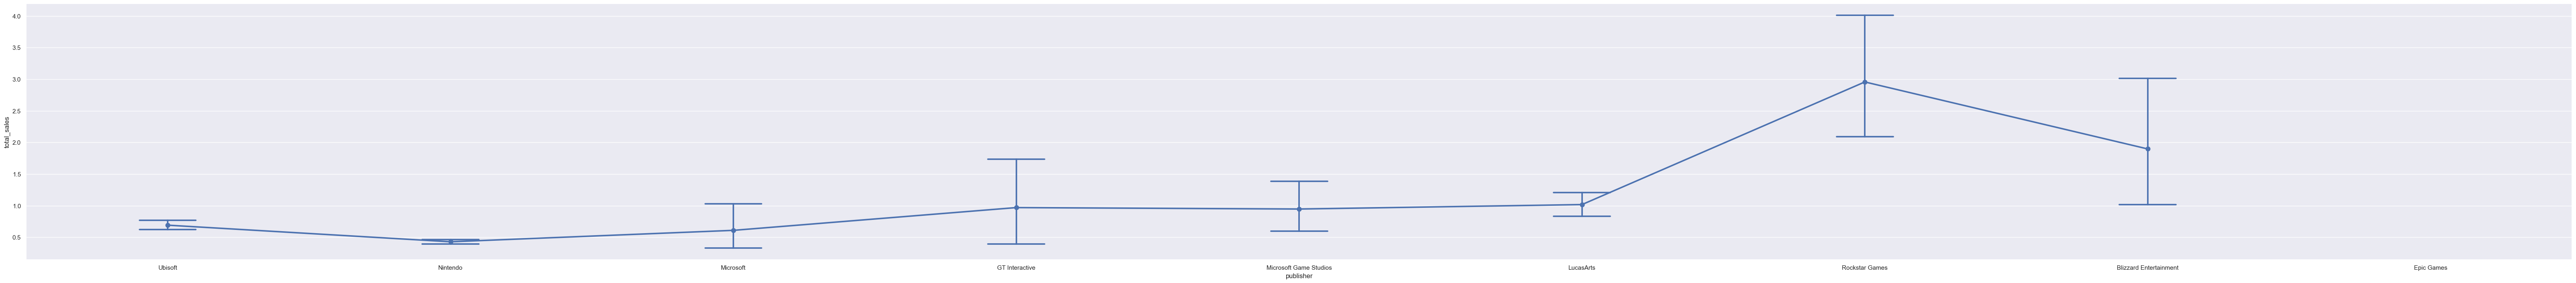

<Figure size 8170x827 with 0 Axes>

In [81]:
ax = sns.pointplot(x=subset_df['publisher'] ,  y=subset_df["total_sales"], data=subset_df, estimator=np.mean,capsize=.2)
plt.figure()
plt.show()

Séléctionner les jeux créee depuis plus de 2014. Comparer avec la courbe précédente la différence

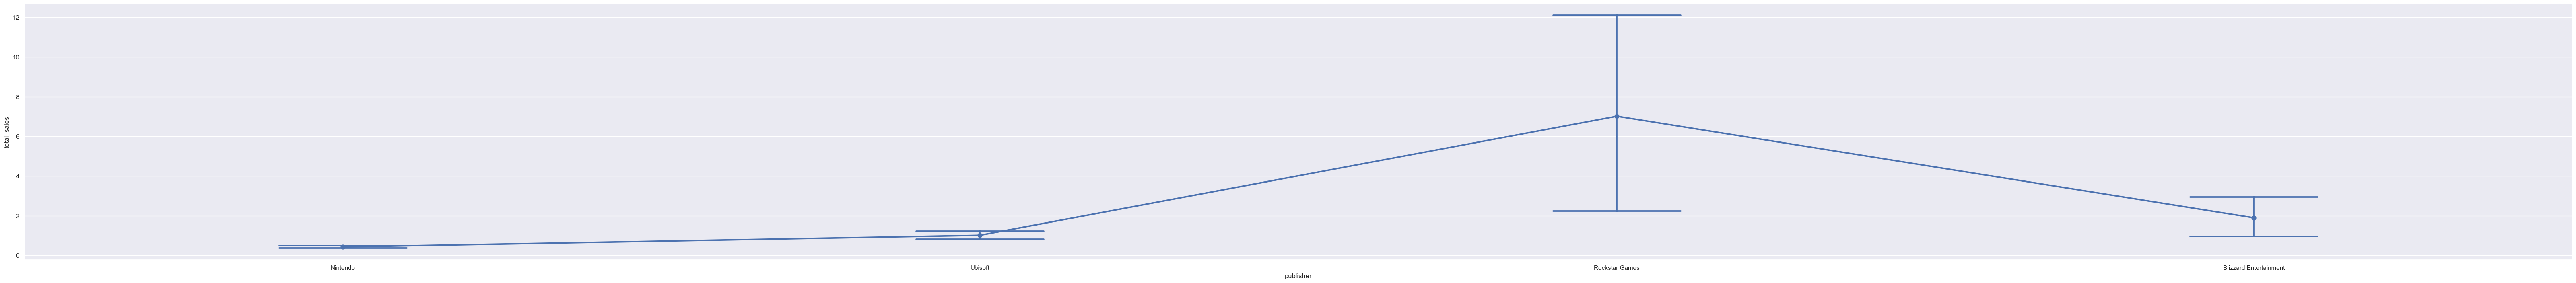

<Figure size 8170x827 with 0 Axes>

In [110]:
ydf = subset_df[subset_df["release_date"]>'2014-00-00']

ax = sns.pointplot(x=ydf['publisher'] ,  y=ydf["total_sales"], data=ydf, estimator=np.mean,capsize=.2)

plt.figure()

plt.show()


Appliquez un centrage réduction sur vos données depuis 2014 et comparer les résultats avec la courbe précédente.

C:\Users\osear\AppData\Local\Temp\ipykernel_396\2856407427.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ydf["total_sales_std"] = (ydf["total_sales"] - mean_sales) / std_sales


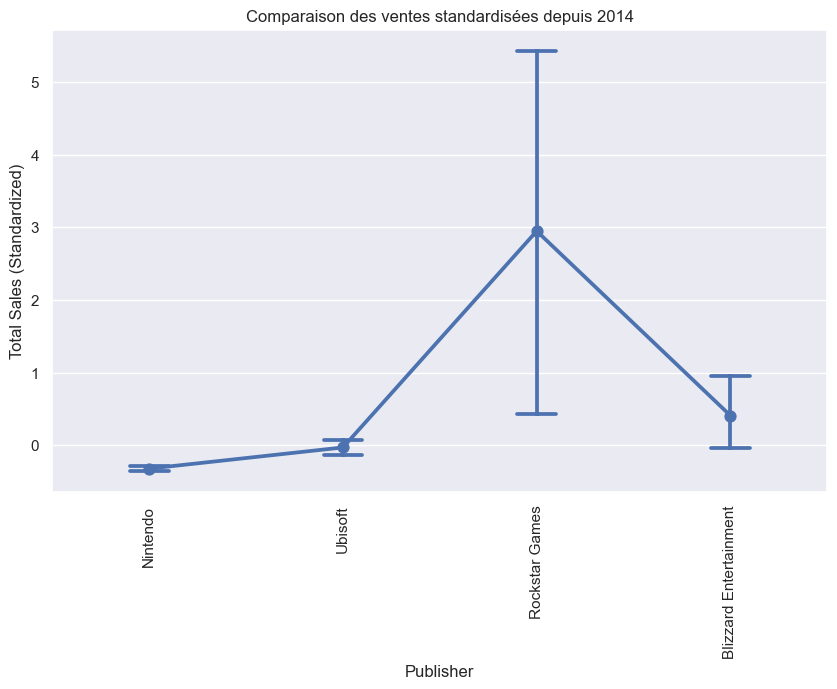

In [111]:

mean_sales = ydf["total_sales"].mean()
std_sales = ydf["total_sales"].std()
ydf["total_sales_std"] = (ydf["total_sales"] - mean_sales) / std_sales

plt.figure(figsize=(10,6))
sns.pointplot(x=ydf["publisher"], y=ydf["total_sales_std"], 
              data=ydf, estimator=np.mean, capsize=0.2)

plt.xticks(rotation=90)
plt.xlabel("Publisher")
plt.ylabel("Total Sales (Standardized)")
plt.title("Comparaison des ventes standardisées depuis 2014")
plt.show()

Séléctionner un dataset ne contenant que des jeux du publisher Rockstar Games

In [115]:
dfR = df[df["publisher"]=="Rockstar Games"]


Construire un interval de confiance autour des ventes de tous les continents pour les jeux de Rockstar games.

Construire un interval de confiance autour des ventes totales pour chaque plateforme possible pour les jeux de Rockstar games.

Effectuez les 2 dernières analyses pour les jeux du publisher Ubisoft. Conclure sur leurs performances respectives